In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/philhoonoh/os/blob/main/lecture_summary/02_Chapter3_part2.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View Source</a>
  </td>
</table>

# Chapter 4. Threads & Concurrency
#### Contents
    - 4.1 Overview
    - 4.4 Thread Library
    - 4.2 Multicore Programming
    - 4.3 Multithreading Models
    - 4.4 Thread Library
    - 4.5 Implicit Threading

## 4.1 Overview

### So far
- chapter3 까지는 __process with a single thread of control__ 다룸
- chapter4 에서는 __process with multiple threads of control__ 다룰 예정

### __thread__

- 경량화된 프로세스
- CPU 활용의 기본 단위
- 메모리 관점 : Code + Data + Heap (공유) + Stack(별도 관리)  
- stack 이 별도 관리 되므로 이와 관련된
    - __thread ID__, __a program counter__, __a register set__, __stack__ 도 (별도관리)


- lightweight process
- basic unit of CPU utilization
- __thread ID__, __a program counter__, __a register set__, __stack__ (별도관리)

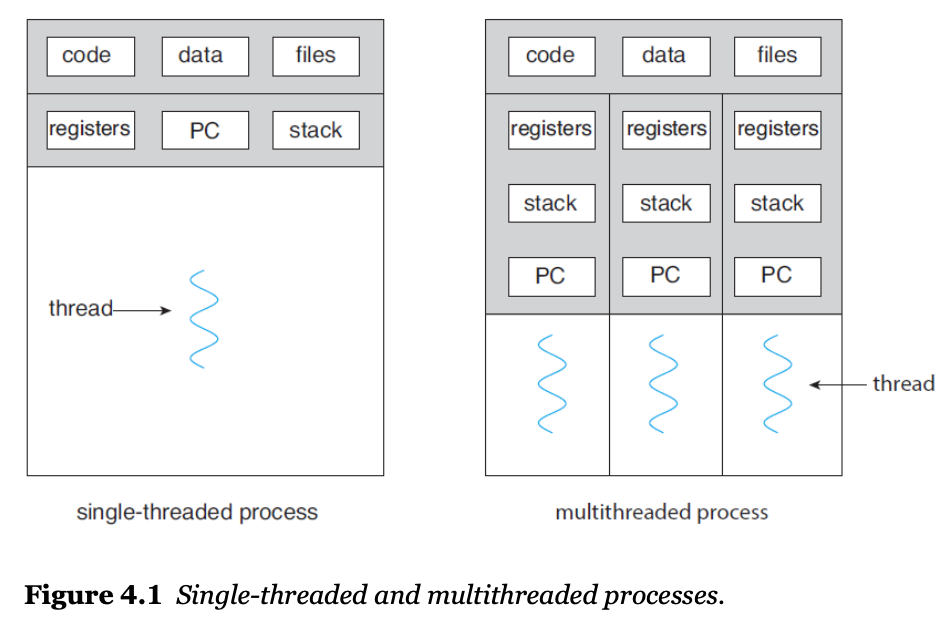

### Motivation for multithreading

- client-server system 를 고려해보자
- multithreading X : 한 프로세스만 동작하므로 하나의 요청 처리 중, 다른 요청들은 대기
- multithreading O : 여러 요청들을 threading을 통해 처리

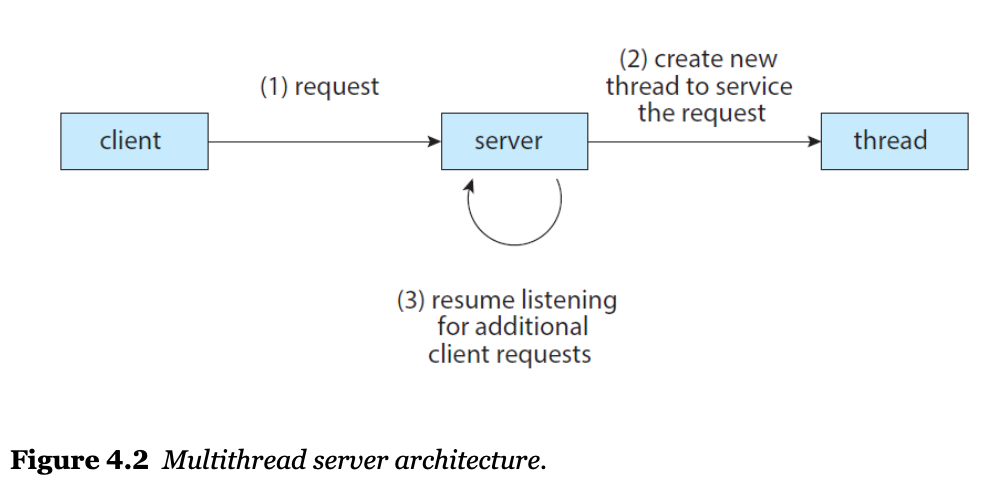

### The benefits of multithreaded programming:

- __Responsiveness__ : may allow continued execution
    - 논블로킹으로 프로그램을 계속 실행 가능
    - if part of process is blocked, especially important for user interfaces.
- __Resource Sharing__ : threads share resources of process
    - IPC 를 사용할 필요가 없음
    - easier than shared-memory or message-passing.
- __Economy__ : cheaper than process creation,
    - process 를 새로 만드는 것보다 비용이 저렴
    - thread switching < context switching
    - thread switching lower overhead than context switching.
- __Scalability__ : process can take advantage of multiprocessor architectures
    - 확장성이 높음
    - The benefits of multithreading can be even greater in a mul- tiprocessor architecture, where threads may be running in parallel on different processing cores.

## 4.4 Thread Library

### Threads in Java

- Java 는 설계부터 쓰레드 모델을 도입하여 기반
    - 쓰레드 생성 관리가 쉬움  
    

- In a Java program,
    - threads are the fundamental model of program execution.
- Java provides a rich set of features
    - for the creation and management of threads

### Three techniques for explicitly creating threads in Java

1. Thread 클래스 상속받기
    - 쓰레드 클래스를 상속하여, public void run() method 재정의   
    - 다만 Java 에서는 다중상속이 안되어 2번 방법을 많이 활용
2. Runnable 인터페이스 구현하기  
    - Runnable interface 를 활용하는 새로운 클래스 생성하여 public void run() method 재정의
3. Runnable 람다 표현식 사용하기 (beginning with Java Version 1.8)
    - 새 클래스를 선언하지 않고 Runnable를 람다 표현식으로 작성
        

1. Inheritance from the Thread class
    - create a new class that is derived from the Thread class.
    - and override its public void run() method. 
2. Implementing the Runnable interface.
    - define a new class that implements the Runnable interface.
    - and override its public void run() method.
3. Using the Lambda expression (beginning with Java Version 1.8)
    - rather than defining a new class,
    - use a lambda expression of Runnable instead.

##### 1. Thread 클래스 상속받기

```java
class MyThread1 extends Thread {
    public void run() {
        try {
             while (true) {
                 System.out.println("Hello, Thread!");
                 Thread.sleep(500);
             }
        }
        catch (InterruptedException ie){
            System.out.println("I'm interrupted");
        }
    }
}
    
public class ThreadExample1 {
    public static final void main(String[] args) { 
        MyThread1 thread = new MyThread1(); 
        thread.start(); // process 의 fork 와 같음, MyThread1 의 public void run 호출
        System.out.println("Hello, My Child!");
    } 
}
```

##### 2. Runnable 인터페이스 구현하기

```java
class MyThread2 implements Runnable {
    public void run() {
        try {
            while (true) {
                System.out.println("Hello, Runnable!");
                Thread.sleep(500);
            }
        }
        catch (InterruptedException ie) {
            System.out.println("I'm interrupted");
        }
    }
}


public class ThreadExample2 {
    public static final void main(String[] args) { 
        Thread thread = new Thread(new MyThread2());
        thread.start();
        System.out.println("Hello, My Runnable Child!");
    } 
}
```

##### 3. Runnable 람다 표현식 사용하기

```java

public class ThreadExample3 {
    public static final void main(String[] args) { 
        Runnable task = () -> {
            try {
                while (true) {
                    System.out.println("Hello, Lambda Runnable!");
                    Thread.sleep(500);
                }
            }
            catch (InterruptedException ie) {
                System.out.println("I'm interrupted");
            }
        };
        
        Thread thread = new Thread(task);
        thread.start();
        System.out.println("Hello, My Lambda Child!");
    } 
}
```

##### 부모 쓰레드의 대기: wait? join!
- process 에서의 wait
- main thread 를 대기, 다른 thread 먼저 실행

```java
public class ThreadExample4 {
    public static final void main(String[] args) {
        Runnable task = () -> {
            for (int i = 0; i < 5; i++) {
                System.out.println("Hello, Lambda Runnable!"); 
            }
        };
        Thread thread = new Thread(task); 
        thread.start();
        try {
               thread.join();
        }
        catch (InterruptedException ie) { 
            System.out.println("Parent thread is interrupted");
        }
        System.out.println("Hello, My Joined Child!"); 
    }
}
```

##### 쓰레드의 종료: stop? interrupt!
- stop -> depreciated

```java
public class ThreadExample5 {
    public static final void main(String[] args) throws InterruptedException {
        Runnable task = () -> {
            try {
                while (true) {
                    System.out.println("Hello, Lambda Runnable!"); 
                    Thread.sleep(100);
                }
            catch (InterruptedException ie) {
                System.out.println("I'm interrupted");
            }
        };
        Thread thread = new Thread(task);
        thread.start();
        Thread.sleep(500);
        thread.interrupt();
        System.out.println("Hello, My Interrupted Child!");
    }
}
```

## 4.2 Multicore Programming

### 멀티코어 에서의 멀티쓰레딩
    - 코어가 많을 수록 concurrency (동시성) 향상 
        - 각각의 process 가 코어를 독점에서 사용
    - 쓰레드가 많을 수록 parrallel (병령처리) 향상
        - single-core : 쓰레드들이 순차적으로 실행
        - multiple-core : 쓰레드들이 병렬적으로 실행 가능 
        

- Multithreading in a Multicore system.
    - more efficient use of multiple cores for improved concurrency.
    - Consider an application with four threads.
        - single-core: threads will be interleaved over time.
        - multiple-cores: some threads can run in parallel.
        
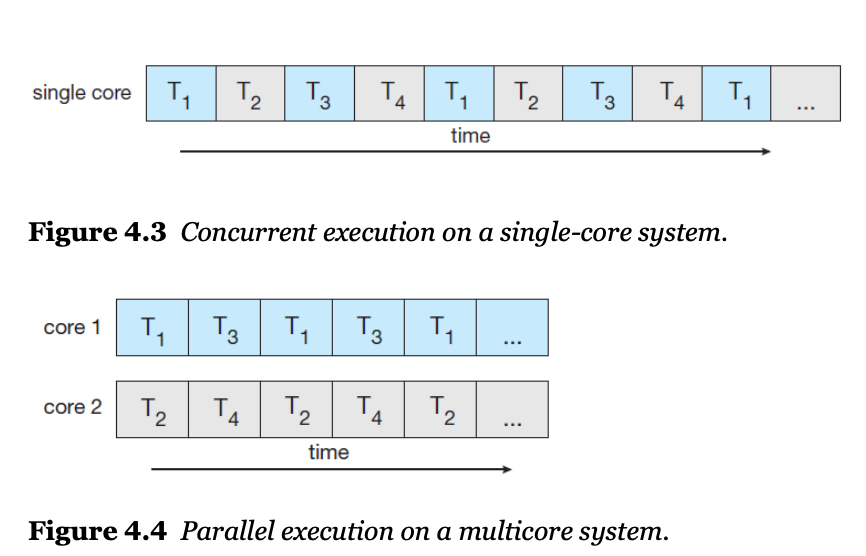

### 멀티코어 시스템에서의 프로그래밍 과제

- Identifying tasks
    - 하나의 task를 각각의 독립적인 세부 task로 구분하여 나누어야 함
    - __동시성(concurrecny)__, __병렬성(parallelsim)__ 을 향상
- Balance
    - task 들을 적절하게 balance 해주어야 된다 (equal work of equal value)
- Data splitting
    - 다른 코어에서도 돌아갈 수 있도록 데이터를 나누어야 함
- Data dependency
    - 데이터 의존을 고려하여 동기화가 필요
- Testing and debugging
    - sinlge-thread 보다 어려움  
        

- Programming Challenges in Multicore systems.
    - Identifying tasks: find areas can be divided into separate tasks.
    - Balance: ensure the tasks to perform equal work of equal value.
    - Data splitting: data also must be divided to run on separate cores.
    - Data dependency: ensure that the execution of tasks is synchronized to accommodate the data dependency
    - Testing and debugging: more difficult than single-thread.

### Types of parallelism
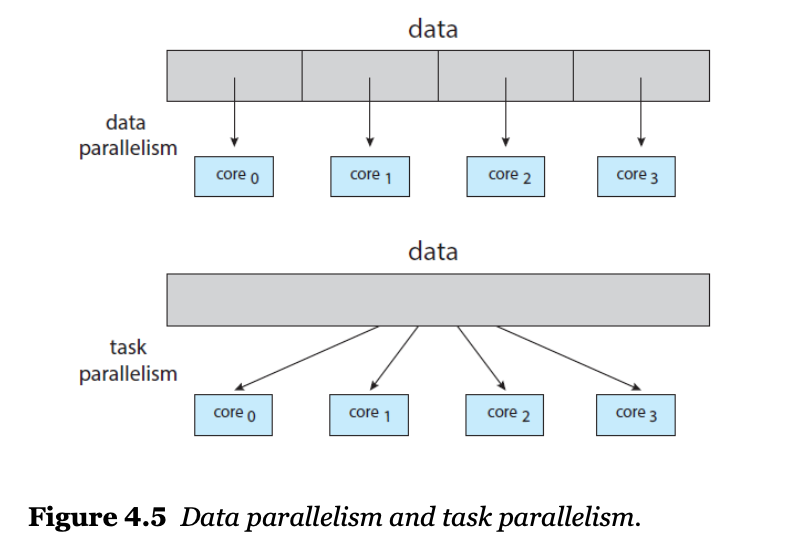

### Amdahl’s Law
- 코어는 무조건 많을수록 좋은가?
$$ speedup <= {1 \over S + {(1-S) \over N}} $$

    - 𝑺: the portion that must be performed serially on a system. 
    - 𝑵: the number of processing cores
    
- For example,
    - S=0.25,N=2,speedup=1.6
    - S=0.25,N=4,speedup=2.28

## 4.3 Multithreading Models

### 쓰레드의 종류
1. __user threads__  
    - 커널 위에서 지원되고, 직접적인 커널 지원이 없음
    - 라이브러리로 지원
2. __kernel threads__
    - OS 가 직접 관리 
    - 실제 할당되는 쓰레드라 생각하면 편함

- Two types of threads:
    - user threads and kernel threads
- User threads are
    - supported above the kernel, and
    - are managed without kernel support.
- Kernel threads are
    - supported and managed directly by the operating system
    
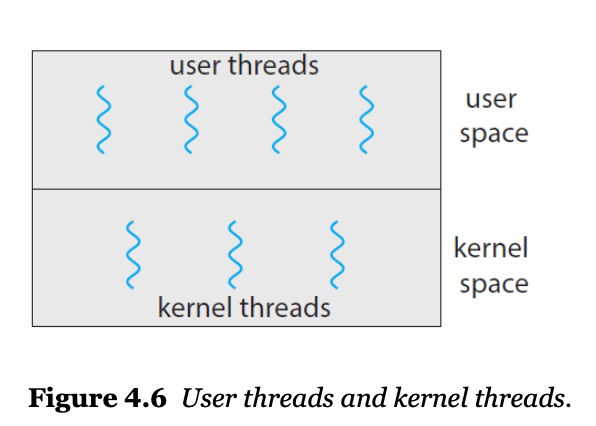

### Three relationships between user and kernel threads: 

- Many-to-One Model
    - N user threads -> 1 kernel thread
    - 쓰레드가 하나라서 block call 이 있으면 해당 프로세스 중지
        - thread makes a blocking system call -> the entire process will block
    - 병렬처리 X, 단지 concurrency 만 있을뿐
        - multiple threads are unable to run in parallel on multicore systems 
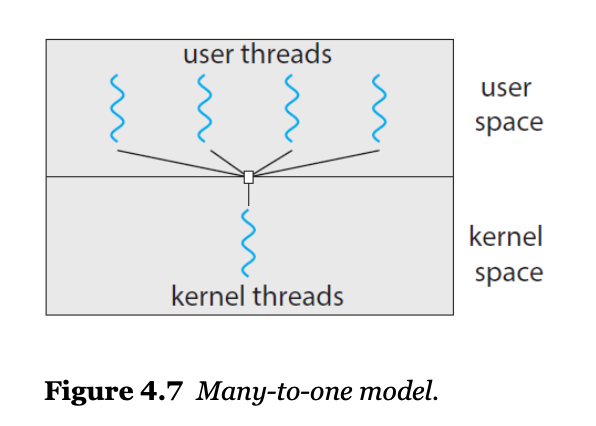

- One-to-One Model
    - 1 user thread -> 1 kernel
    - block call 이 있어도 다른 thread 사용 가능
    - 병렬 처리 가능
    - 유저 쓰레드 수만큼 커널 쓰레드 필요
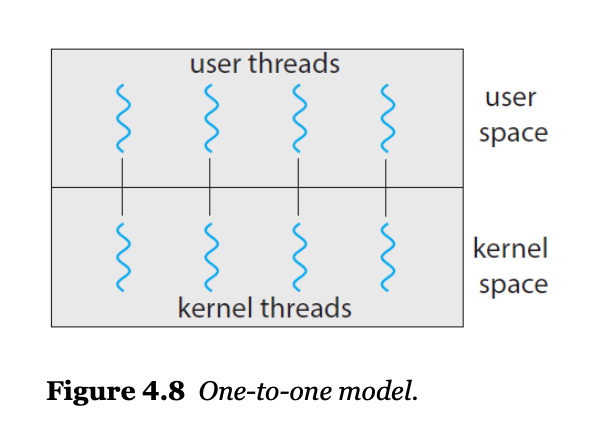

- Many-to-Many Model
    - N user threads -> M kernel threads (M <= N)
    - 위의 두 모델의 결함이 없음
        - many-to-one : no parallelsim
        - one-to-one : thread 개수 제한
    - 사용하기 어려워 잘 사용 안함 -> one-to-one model을 많이 사용
    
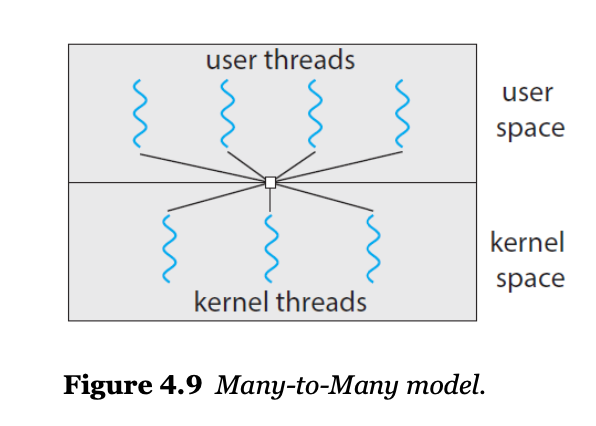

## 4.4 Thread Libraries

### thread library
- 쓰레드를 관리하기 위한 API 제공
- 종류
    - POSIX Pthreads
    - Windows thread
    - Java thread  
    
    
- provides an API for creating and managing threads.  

### Pthreads
    - refers to the POSIX standard (IEEE 1003.1c)
    - just a specification for thread behavior, not an implementation.

- gcc -pthread file_name.c

```c
#include <stdio.h>
#include <stdlib.h>
#include <pthread.h>

/* the data shared by the threads */
int sum;

/* thread call this function */ 
void * runner(void *param);

int main(int argc, char *argv[])
{
    pthread_t tid;          // thread identifier
    pthread_attr_t attr;    // thread attributes
    
    pthread_attr_init(&attr);
    pthread_create(&tid, &attr, runner, argv[1]);
    pthread_join(tid, NULL);
    
    printf("sum = %d\n", sum);
}

void *runner(void *param)
{
    int i, upper = atoi(param);
    sum = 0
    for (i<=0; i<=uppper; i++)
        sum += i;
    pthread_exit(0);
}
```

### Exercise 4.19 (p. 910)
    
```c
#include <stdio.h>
#include <unistd.h>
#include <wait.h>
#include <pthread.h>

int value = 0;
void * runner(void *param);

int main(int argc, char *argv[])
{
    pid_t pid; 
    pthread_t tid;
    pthread_attr_t attr;
    
    pid = fork();
    
    if (pid == 0) { // child process
        pthread_attr_init(&attr);
        pthread_create(&tid, &attr, runner, NULL);
        pthread_join(tid, NULL);
        printf("CHILD: value = %d\n", value); // LINE C
    }
    else if (pid > 0) { // parent process
        wait(NULL);
        printf("PARENT: value = %d\n", value); // LINE P
    }
}

void *runner(void *param) 
{
    value = 5;
    pthread_exit(0);
}
```

### Exercise 4.17 (p. 910)
- Consider the following code segment:
    - a. How many unique processes are created? 6개 
    - b. How many unique threads are created? 2개
    
    
```c
pid_t pid;

pid = fork();

if (pid == 0) { // child process 
    fork();
    thread_create(...);
}
fork();

```

- pid = fork(); 첫번째 포크
    - p0 -> p1
- child process if 문 안의 fork();
    - p1 -> p2
- child process thread_create(...);
    - p1 -> thread1
    - p2 -> thread2
- child process 마지막 포크
    - p1 -> p3
    - p2 -> p4
- parent process 마지막 포크
    - p0 -> p5

- 총 process : p0, p1, p2, p3, p4, p5 6개
- 총 thread : t1, t2 2개

## 4.5 Implicit Threading

### Implicit Threading 

- 운영체제에게 쓰레드 생산, 관리를 맡기는 것
- 응용프로그램에서의 동시성 과 병렬성 설계 
    - 멀티코어 시스템 상의 멀테쓰레딩 에서 매우 어려움
- compiler, run-time libraries 에 이러한 설계를 넘김
  

- The design of concurrent and parallel applications,
    - i.e., the design of multithreading in multicore systems,
    - is too difficult for application developers.
- So, transfer the difficulty to compiler and run-time libraries


### Implicit Threading 의 4가지 방법

- Thread Pools
    - 쓰레풀을 만들어서 관리 
    - create a number of threads in a pool where they await work. 
    

- Fork & Join
    - 위에서 언급한 pthread 의 create, join 사용 
    - explicit threading, but an excellent candidate for implicit threading. 
    

- OpenMP
    - __OpenMP__ 컴파일러를 활용
    - a set of compiler directives and an API for programs written in C/C++. 
    
    
- Grand Central Dispatch (GCD)
    - 애플애서 개발
    - developed by Apple for its macOS and iOS operating system.

### OpenMP

- 지정한 코드 블럭을 자동으로 병렬처리하게 해줌
- OpenMP 컴파일러 활용
    - #pragma omp parallel -> OpenMP compiler 지시어
    - 이전 위의 설명들은 library 만 활용 
- OpenMP library 가 지정된 부분을 컴파일 하여 병렬처리를 가능케 만들어줌


- identifies parallel regions as blocks of code that may run in parallel.
- insert compiler directives into source code at parallel regions.
- these directives instruct OpenMP runtime library to execute the region in parallel.

- $ gcc -fopenmp filename.c


```c
#include <stdio.h>
#include <omp.h>

int main(int argc, char *argv[])
{
    #pragma omp parallel
    {
        printf("I am a parallel region.\n");
    }
    
    return 0;
}
```

```c
#include <stdio.h>
#include <omp.h>

int main(int argc, char *argv[])
{
    omp_set_num_threads(4);

    #pragma omp parallel
    {
        printf("OpenMP thread: %d\n", omp_get_thread_num());
    }
    
    return 0;
}
```

```c
#include <stdio.h>
#include <omp.h>

#define SIZE 100000000

int a[SIZE], b[SIZE], c[SIZE];

int main(int argc, char *argv[])
{
    int i;
    for (i = 0; i < SIZE; i++)
        a[i] = b[i] = i;

    #pragma omp parallel
    for (i = 0; i < SIZE; i++) {
        c[i] = a[i] + b[i];
    }
    
    return 0;
}
```

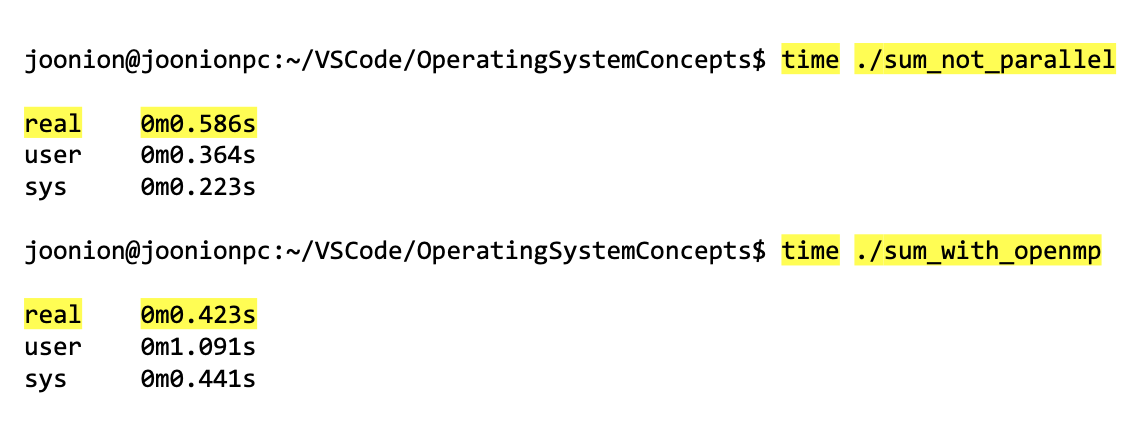